In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import NMF

from nltk.corpus import stopwords

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

Users: 97265
Beers: 103105
Substyles: 104
Breweries: 3052

Text Reviews:
Ratings:

Review Date Range: 1/13/98 to  8/8/17

Charts
* Distribution of overall reviews
* Distribution of average scores
* Reviews by date
* Beers by type
* ABV ? ABV by beer type average?

In [11]:
beers = pd.read_csv('/Users/marc/ds/metis/metisgh/beers/beers_final.csv',header=0,
                    names = ['index', 'beername', 'brewery', 'style', 'abv','avg_review_score'])
styles = pd.read_csv('/Users/marc/ds/metis/metisgh/beers/styles.csv')

In [12]:
beers = beers.merge(styles,how='left',left_on='style',right_on='style3').drop_duplicates()
beers.drop('style',axis=1,inplace=True)
beers.columns = ['index', 'beername', 'brewery', 'abv', 'avg_review_score', 'style1','style2', 'style3']

In [13]:
reviews = pd.read_csv('/Users/marc/ds/metis/metisgh/beers/reviews_final.csv',header=0,
names = ['index', 'reviewdate', 'avgscore', 'rDev', 'username', 'review','look', 'smell', 'taste', 'feel', 'overall'])

In [14]:
allbeer = reviews.merge(beers,how='left',left_on='index',right_on='index').drop_duplicates()

In [15]:
# Get uniform beer numbers
beernames = beers[['beername','brewery']].sort_values('beername').drop_duplicates().values
beernames = pd.DataFrame(beernames,columns=['beername','brewery'])
beernames['beernum'] = beernames.index

In [16]:
# Update 'allbeer' beer numbers
allbeer = pd.merge(allbeer, beernames,  how='left', left_on=['beername','brewery'], right_on = ['beername','brewery'])
allbeer.drop('index',axis=1,inplace=True)
allbeer.drop_duplicates(inplace=True)

In [17]:
# Update 'beers' beer numbers
beers = pd.merge(beers, beernames,  how='left', left_on=['beername','brewery'], right_on = ['beername','brewery'])
beers.drop('index',axis=1,inplace=True)
beers.drop_duplicates(inplace=True)

In [18]:
allratings = allbeer.copy()
allbeer = allbeer.dropna(axis=0,how='any')
allbeer = allbeer[allbeer.review.str.len()>100]

In [137]:
# DELETE
allratings.columns

Index(['reviewdate', 'avgscore', 'rDev', 'username', 'review', 'look', 'smell',
       'taste', 'feel', 'overall', 'beername', 'brewery', 'abv',
       'avg_review_score', 'style1', 'style2', 'style3', 'beernum'],
      dtype='object')

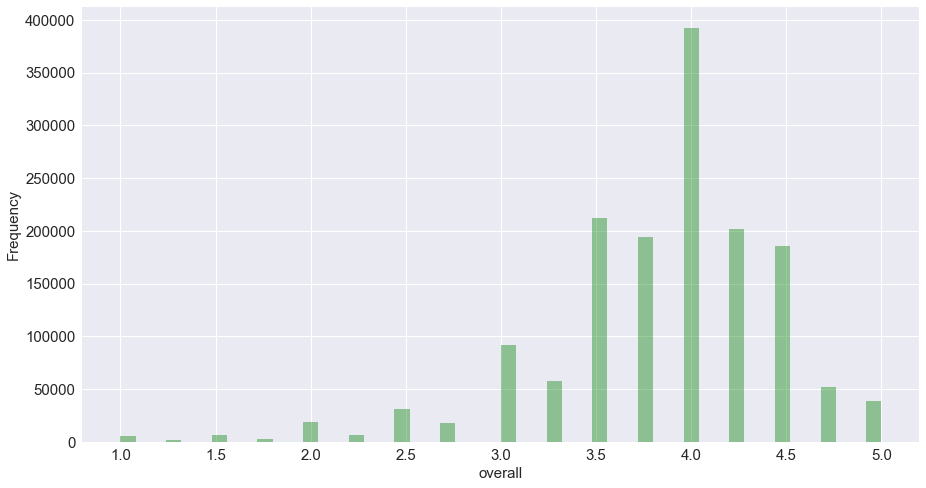

In [178]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=15)
plt.xlabel('Overall',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
sns.distplot(allratings.overall.dropna(how='any'),kde=False,color=['g'])

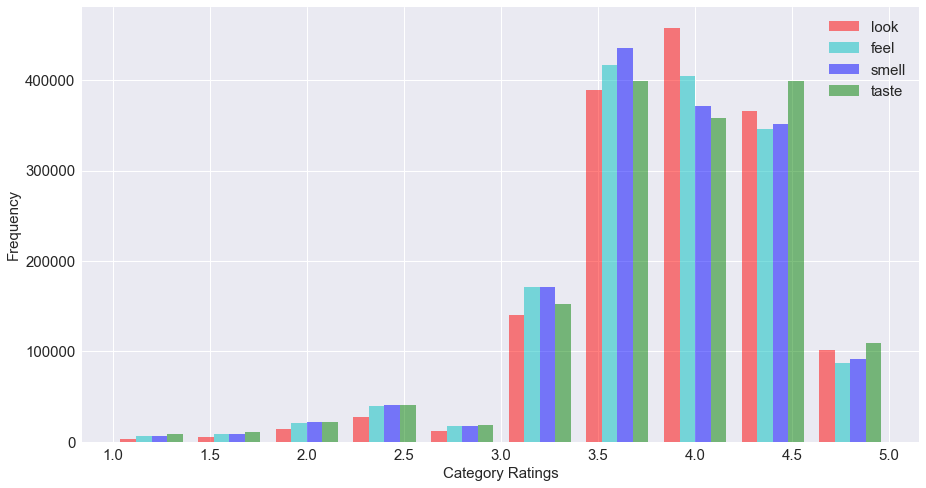

In [182]:
look = allratings.look.dropna(how='any')
feel = allratings.feel.dropna(how='any')
smell = allratings.smell.dropna(how='any')
taste = allratings.taste.dropna(how='any')

plt.figure(figsize=(15,8))
plt.xticks(fontsize=15)
plt.xlabel('Category Ratings',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.hist([look,feel,smell,taste], label=['look','feel','smell','taste'],color=['r','c','b','g'], alpha=0.5)
plt.legend(fontsize=15)

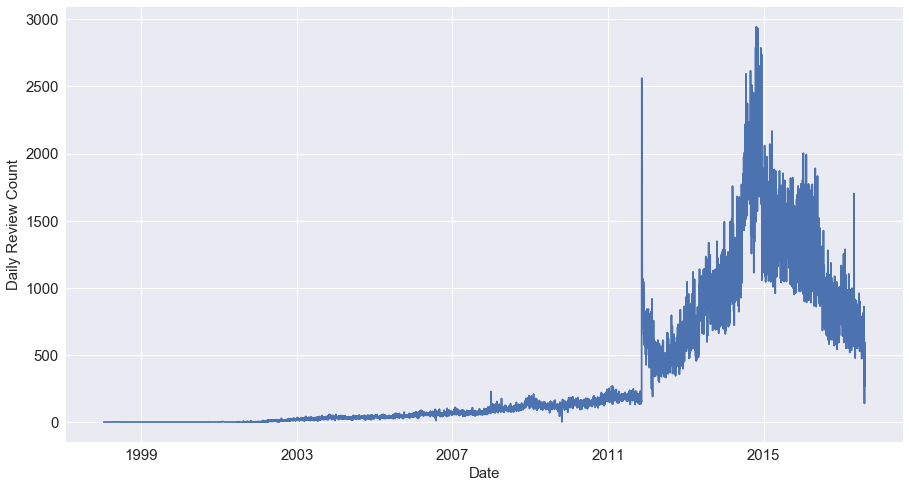

In [198]:
reviewsbydate = allratings.copy()
reviewsbydate.reviewdate = pd.to_datetime(allratings.reviewdate)
reviewsbydate = reviewsbydate.groupby('reviewdate')['beernum'].count()

plt.figure(figsize=(15,8))
plt.xticks(fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Daily Review Count',fontsize=15)
plt.plot(reviewsbydate)

In [201]:
beers.groupby(['style1','style2','style3'])['beernum'].count()

style1  style2                 style3                            
Ale     American Ales          American Amber / Red Ale              150
                               American Barleywine                   151
                               American Black Ale                    150
                               American Blonde Ale                   150
                               American Brown Ale                    151
                               American Dark Wheat Ale                71
                               American Double / Imperial IPA        150
                               American Double / Imperial Stout      150
                               American IPA                          150
                               American Pale Ale (APA)               149
                               American Pale Wheat Ale               150
                               American Porter                       150
                               American Stout             

In [135]:
## DELETE

# Users: 97265
# Beers: 103105
# Substyles: 104
# Breweries: 3052

# Text Reviews:
# Ratings:r

# Charts
# * Distribution of overall reviews
# * Distribution of average scores
# * Reviews by date
# * Beers by type
# * ABV ? ABV by beer type average?


In [61]:
pd.to_pickle(allratings,'/Users/marc/ds/metis/metisgh/beers/allratings.pkl')
pd.to_pickle(beers,'/Users/marc/ds/metis/metisgh/beers/beers.pkl')

### Generate Random Reviews

In [171]:
# def generate_reviews(n):
#     reviews = []
#     indices = []
#     for n in range(0,n):
#         num = np.random.randint(0,allbeer.shape[0])
#         reviews.append(allbeer.review.iloc[num])
#         indices.append(num)
#     return reviews,indices

In [172]:
# reviews = []
# beernums = []

# for beernum in allbeer.beernum.unique():
#     reviews.append(allbeer[allbeer.beernum==beernum].review.str.cat())
#     beernums.append(beernum)

### Define Stopwords

In [205]:
my_stopwords = [
'glass','decent','well','drink','12','12 oz','beer','beers','brewery',
'would','better','definitely','ever','best','good','great','just','like',
'really','one','bottle','bit','get','though','quite','way','slightly',
'tastes','much','try','nothing','lots','particularly','touch','first',
'pretty','think','still','even','something','almost','say','maybe','lot',
'sure','go','kind','got','enough','time','also','see','could','pint',
'pack','real','hint','know','another','note','notes','going','seems',
'little','end','side'
]
all_stopwords = stopwords.words('english') + my_stopwords

## NMF Topic Modeling

In [174]:
# def nmf_tfidf(documents,max_df,min_df,n_topics,n_terms,threshold=1):
#     vectorizer = TfidfVectorizer(max_df=max_df,min_df=min_df, stop_words=all_stopwords,use_idf=True, ngram_range=(1,3))
#     dtm = vectorizer.fit_transform(documents)
    
#     nmf_model = NMF(n_topics,verbose=1)
#     dtm_nmf = nmf_model.fit_transform(dtm)
#     dtm_nmf = Normalizer(copy=False).fit_transform(dtm_nmf)

#     _idx = np.amax(dtm_nmf, axis=1) > threshold  # idx of doc above the threshold
#     X_topics = dtm_nmf[_idx]

#     wt = pd.DataFrame(nmf_model.components_,columns=vectorizer.get_feature_names()).T.reset_index()
#     wt = wt.set_index('index')
#     wt.index.name = None

#     for column in wt.columns:
#         print("Topic",column+1,": Top",n_terms,"Terms\n-----------------------")
#         print(wt.iloc[:,column].sort_values(ascending=False)[:n_terms])
#         print("\n-----------------------")
    
#     return vectorizer,dtm_nmf,wt

In [176]:
# %time vectorizer,DTM_NMF,WT = nmf_tfidf(reviews,max_df=0.25,min_df=0.05,n_topics=10,n_terms=10,threshold = 1)

In [536]:
# pd.to_pickle(vectorizer,'/Users/marc/ds/metis/metisgh/beers/vectorizer.pkl')
# pd.to_pickle(reviews,'/Users/marc/ds/metis/metisgh/beers/random_reviews.pkl')
# pd.to_pickle(beernums,'/Users/marc/ds/metis/metisgh/beers/beernums.pkl')
# pd.to_pickle(DTM_NMF,'/Users/marc/ds/metis/metisgh/beers/DTM_NMF.pkl') 
# pd.to_pickle(WT,'/Users/marc/ds/metis/metisgh/beers/WT.pkl')

In [ ]:
vectorizer = pd.read_pickle('/Users/marc/ds/metis/metisgh/beers/awsdata/vectorizer.pkl')
reviews = pd.read_pickle('/Users/marc/ds/metis/metisgh/beers/awsdata/random_reviews.pkl')
beernums = pd.read_pickle('/Users/marc/ds/metis/metisgh/beers/awsdata/beernums.pkl')
DTM_NMF = pd.read_pickle('/Users/marc/ds/metis/metisgh/beers/awsdata/DTM_NMF.pkl') 
WT = pd.read_pickle('/Users/marc/ds/metis/metisgh/beers/awsdata/WT.pkl')

/Users/marc/anaconda/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.0 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [28]:
for column in WT.columns:
    print("Topic",column+1,": Top",10,"Terms\n-----------------------")
    print(WT.iloc[:,column].sort_values(ascending=False)[:10])
    print("\n-----------------------")

Topic 1 : Top 10 Terms
-----------------------
funk         2.282436
oak          1.945673
brett        1.331332
cherries     1.246573
vinegar      1.189189
funky        1.127832
lambic       1.014938
raspberry    0.945039
saison       0.768930
lactic       0.758997
Name: 0, dtype: float64

-----------------------
Topic 2 : Top 10 Terms
-----------------------
porter              1.975296
dark chocolate      1.458304
milk                1.065189
chocolate coffee    0.863560
black color         0.783102
stouts              0.739619
oatmeal             0.710215
mocha               0.691130
espresso            0.686042
coffee chocolate    0.674076
Name: 1, dtype: float64

-----------------------
Topic 3 : Top 10 Terms
-----------------------
bourbon           3.601535
barrel            1.673268
oak               1.298070
aged              0.594019
barrel aged       0.537815
bourbon barrel    0.529633
whiskey           0.521314
barleywine        0.392595
coconut           0.330083
barrels 

### PCA & K-Means++

In [ ]:
dtm2 = vectorizer

In [20]:
reduced_data = PCA(n_components=2).fit_transform(dtm2)

In [127]:
kmeans = KMeans(init='k-means++',n_clusters=10,verbose=0)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [99]:
# clusters = pd.DataFrame(DTM_NMF)
# clusters['Max_Cluster'] = clusters.idxmax(axis=1)
# clusters['K-Means'] = kmeans.labels_

In [124]:
clusters.sort_values('K-Means');

In [123]:
clusters.groupby(['Max_Cluster','K-Means']).count().loc[:,0].reset_index();

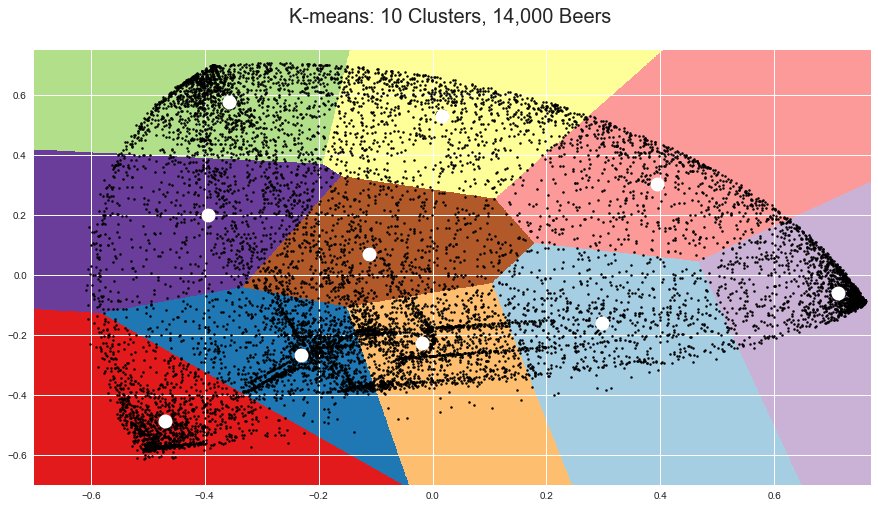

In [203]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=120, linewidths=3,
            color='w', zorder=10)
plt.title('K-means: 10 Clusters, 14,000 Beers \n'
          '',fontsize=20)
plt.xlim(-0.7, 0.77)
plt.ylim(-0.7, 0.75)
# plt.xticks(())
# plt.yticks(())
plt.show()

In [46]:
beers.head()

,beername,brewery,abv,avg_review_score,style1,style2,style3,beernum
0,Fat Tire Amber Ale,New Belgium Brewing,0.0520,3.60,Ale,American Ales,American Amber / Red Ale,4464
1,Sublimely Self-Righteous Black IPA,Stone Brewing,0.0870,4.20,Ale,American Ales,American Black Ale,12158
2,Bigfoot Barleywine-Style Ale,Sierra Nevada Brewing Co.,0.0960,4.14,Ale,American Ales,American Barleywine,1475
3,Censored,Lagunitas Brewing Company,0.0675,3.76,Ale,American Ales,American Amber / Red Ale,2678
4,Flipside Red IPA,Sierra Nevada Brewing Co.,0.0620,3.84,Ale,American Ales,American Amber / Red Ale,4641


### Recommender

In [132]:
beer_topics = pd.DataFrame(DTM_NMF)

In [33]:
sims = pd.read_pickle('/Users/marc/ds/metis/metisgh/beers/awsdata/sims.pkl')

In [47]:
# sims = cosine_similarity(beer_topics)
# sims = pd.DataFrame(sims,columns=beer_topics.index,index=beer_topics.index)

In [52]:
# Beer Search
def findBeer(string):
    return beers[beers.beername.str.contains(string)][['beernum','beername','brewery']]

def getBeernum(index):
    return review_indices[index]

def getIndex(beernum):
    return indices.index(beernum)

def getBeername(beernum):
    return beers[beers.beernum == beernum]

In [35]:
def nearestNeighbors(beernum,df,neighbors):
    distances = []
    for i in df.columns:
        if i != beernum:
            sim = df[i][beernum]
            distances.append((sim, i))
    distances.sort(reverse=True)
    return distances[:neighbors]

In [60]:
def returnbeers(beernum,num_recs,num_neighbors,how='overall'):
    '''
    beernum: beer index
    num_recs: number of beers to recommend
    num_neighbors: number of similar beers to base recommendations on 
    how: avgscore,look,smell,taste,feel,overall,abv
    '''
    
    recs = list(set([x[1] for x in nearestNeighbors(beernum,sims,num_neighbors)]))
    
    result = allratings[allratings.beernum.isin(recs)]
    result = result.groupby(['beernum'],as_index=False)[['beernum','avgscore','look','smell','taste','feel','overall','abv']].mean()
    
    beerinfo = beers[beers.beernum.isin(recs)].drop('abv',axis=1)
    
    output = pd.merge(beerinfo, result,  how='left', left_on=['beernum'], right_on = ['beernum'])
    if how == 'abv':
        output = output[['beernum','beername', 'brewery', 'style1', 'style2', 'style3','abv']]
    else:
        output = output[['beernum','beername', 'brewery', 'style1', 'style2', 'style3','abv'] + [how]]
    
    return output.sort_values(how,ascending=False)[:num_recs]

returnbeers(445,3,10,how='abv')

,beernum,beername,brewery,style1,style2,style3,abv
5,3489,Day Of The Dead Beer (Cerveza De Los Muertos) ...,Cerveceria Mexicana S.A. De C.V.,Ale,German Ales,Hefeweizen,0.055
3,9602,Plum Island Belgian White,Newburyport Brewing Company,Ale,Belgian / French Ales,Witbier,0.054
6,13430,Weihenstephaner Kristallweissbier,Bayerische Staatsbrauerei Weihenstephan,Ale,German Ales,Kristalweizen,0.054
